In [16]:
# Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from scipy.optimize import curve_fit
from matplotlib import colors as mcolors

# Plot parameters
plt.rcParams.update({
    'lines.linewidth': 2,          # linewidth
    'text.usetex': True,           # LaTeX font
    'font.family': 'sans serif',   # Serif family
    'font.size': 20,               # font size
    'axes.titlesize': 24,          # title size
    'axes.grid': True,             # grid
    'grid.linestyle': "-.",        # grid style
})

In [18]:
"""
The first part of the analysis is to make a plot of the scan of the coincidence rate against 
the delay and motivate the choice for the delay value.
"""

# Open the file
data_count = pd.read_csv('./tmp/coincidence_settings/coincidence_count.csv')

# Data variables
delay = data_count['detector_t_and_a'].values
coincidence_rate = data_count['coincidence_t_and_b'].values

# Standard deviation
errors_coincidence = np.sqrt(coincidence_rate * 10) / 10

Highest coincidence rate: 364.00 ± 6.03


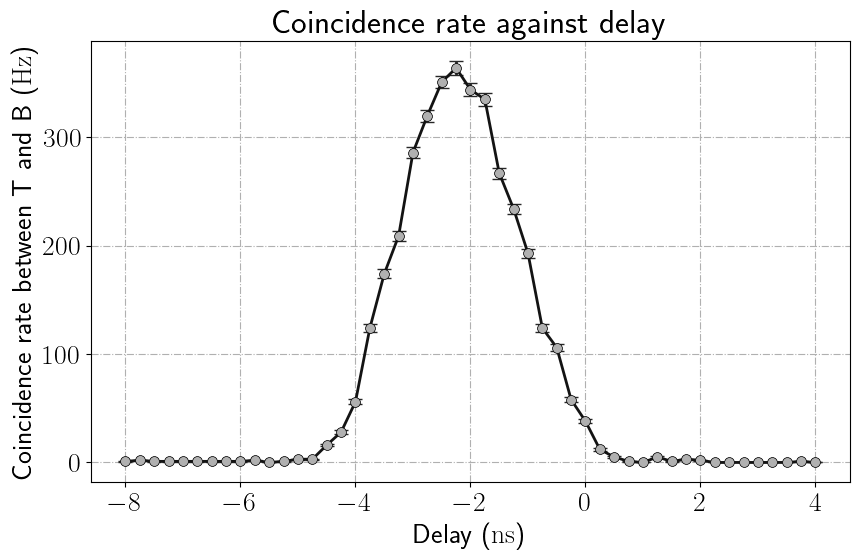

In [39]:
"""
Plot of the coincidence rate between detectors T and B against the delay
""" 
# Figure size
plt.figure(figsize = (9, 6))

# Figure title and legends
plt.title(r"\textsf{Coincidence rate against delay}")
plt.xlabel(r"\textsf{Delay ($\mathrm{ns}$)}")
plt.ylabel(r"\textsf{Coincidence rate between T and B ($\mathrm{Hz}$)}")

# Plot of the errors
plt.errorbar(delay, coincidence_rate, yerr = errors_coincidence, 
             fmt = 'o', capsize = 5, color = '#272727')

# Plot of the delay and coincidence rate
plt.plot(delay, coincidence_rate, color = '#131313')
plt.scatter(delay, coincidence_rate, facecolor = '#B0B0B0', 
            edgecolor = '#000000', linewidth = 0.5, s = 50, zorder = 4)

# Final figure parameters
plt.tight_layout()
plt.savefig('./figures/coincidence_rate_delay.pdf')

# Maximum coincidence value
max_value = np.max(coincidence_rate)
max_value_index = np.argmax(coincidence_rate)

# Print the highest coincidence rate
print(f'Highest coincidence rate: {max_value:.2f} ± {errors_coincidence[max_value_index]:.2f}')

In [30]:
"""
Analysis of the coincidence rate, accidental rate, and SNR against different values of the window width
"""

# Open the file
data_coincidence = pd.read_csv('./tmp/coincidence_settings/coincidence_settings.csv')

# ===  Coincidence rate against window width ===
# Data variables
coincidence_window = data_coincidence['width_coincidence_window'].values
bt_coincidence_rate = data_coincidence['b_and_t_coincidence_rate'].values

# Standard deviation
errors_coincidence_bt = np.sqrt(bt_coincidence_rate * 10) / 10

Highest coincidence between T & B: 898.10 ± 9.48


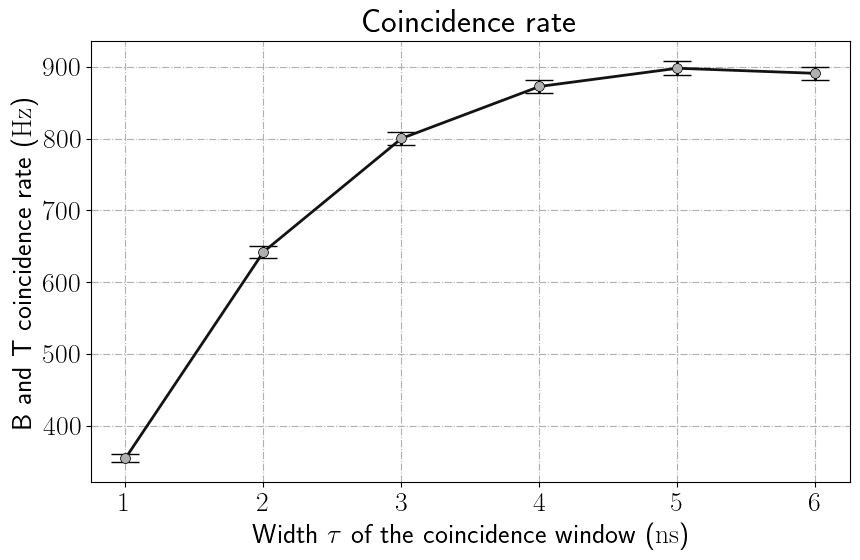

In [38]:
"""
Plot of the coincidence rate between detectors T and B against the window width
""" 
# Figure size
plt.figure(figsize = (9, 6))

# Figure title and legends
plt.title(r"\textsf{Coincidence rate}")
plt.xlabel(r"\textsf{Width $ \tau $ of the coincidence window ($\mathrm{ns}$)}")
plt.ylabel(r"\textsf{B and T coincidence rate ($\mathrm{Hz}$)}")

# Plot of the errors
plt.errorbar(coincidence_window, bt_coincidence_rate, yerr = errors_coincidence_bt, 
             fmt = 'o', capsize = 10, color = '#000000')

# Plot of the window width against the coincidence rate
plt.plot(coincidence_window, bt_coincidence_rate, color = '#131313')
plt.scatter(coincidence_window, bt_coincidence_rate, facecolor = '#B0B0B0', 
            edgecolor = '#000000', linewidth = 0.5, s = 50, zorder = 4)

# Final figure parameters
plt.tight_layout()
plt.savefig('./figures/coincidence_rate.pdf')

# Maximum coincidence value
max_value_coin_bt = np.max(bt_coincidence_rate)
max_value_index_coin_bt = np.argmax(bt_coincidence_rate)

# Print the highest coincidence rate
print(f'Highest coincidence between T & B: {max_value_coin_bt:.2f} ± {errors_coincidence_bt[max_value_index_coin_bt]:.2f}')

In [35]:
# ===  Accidental coincidence rate against window width ===
# Data variables
bt_accidental_coincidence_rate = data_coincidence['accidental_b_and_t_coincidence_rate'].values

# Standard deviation
errors_accidental_bt = np.sqrt(bt_accidental_coincidence_rate * 10) / 10

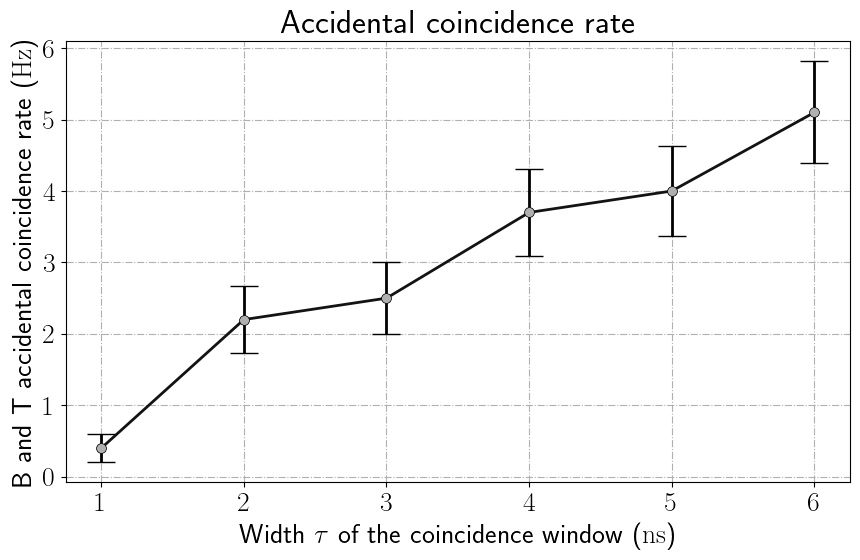

In [41]:
"""
Plot of the accidental coincidence rate between detectors T and B against the window width
""" 
# Figure size
plt.figure(figsize = (9, 6))

# Figure title and legends
plt.title(r"\textsf{Accidental coincidence rate}")
plt.xlabel(r"\textsf{Width $ \tau $ of the coincidence window ($\mathrm{ns}$)}")
plt.ylabel(r"\textsf{B and T accidental coincidence rate ($\mathrm{Hz}$)}")

# Plot of the errors
plt.errorbar(coincidence_window, bt_accidental_coincidence_rate, yerr = errors_accidental_bt, 
             fmt = 'o', capsize = 10, color = '#000000')

# Plot of the window width against the coincidence rate
plt.plot(coincidence_window, bt_accidental_coincidence_rate, color = '#131313')
plt.scatter(coincidence_window, bt_accidental_coincidence_rate, facecolor = '#B0B0B0', 
            edgecolor = '#000000', linewidth = 0.5, s = 50, zorder = 4)

# Final figure parameters
plt.tight_layout()
plt.savefig('./figures/accidental_coincidence_rate.pdf')

In [43]:
# === Comparison between experimental and expected accidental coincidence values ===
# Expected values
expected_accidental_rate = data_coincidence['expected_accidental_coincidence_rate'].values

# Linear regression on experimental data
res = stats.linregress(coincidence_window, bt_accidental_coincidence_rate)

R-squared: 0.96


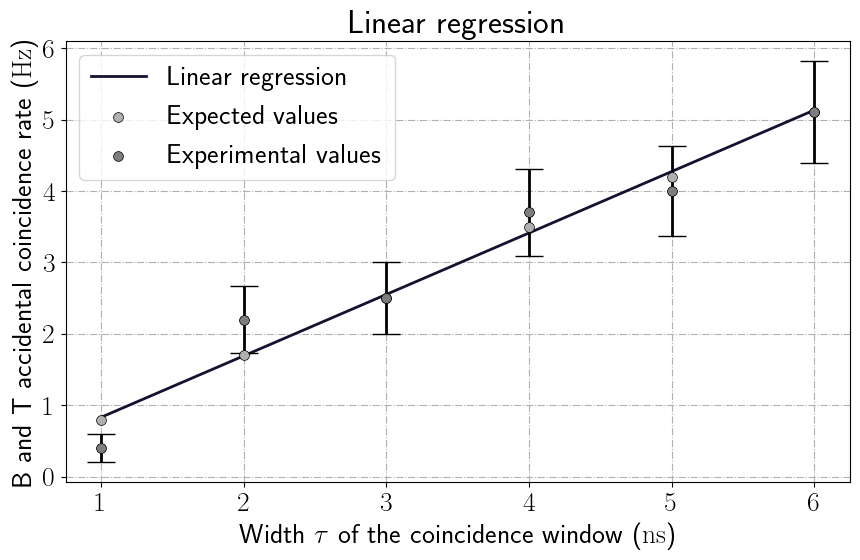

In [46]:
"""
Plot of the comparison between experimental and expected accidental coincidence values
""" 
# Figure size
plt.figure(figsize = (9, 6))

# Figure title and legends
plt.title(r"\textsf{Linear regression}")
plt.xlabel(r"\textsf{Width $ \tau $ of the coincidence window ($\mathrm{ns}$)}")
plt.ylabel(r"\textsf{B and T accidental coincidence rate ($\mathrm{Hz}$)}")

# Linear regression
plt.plot(coincidence_window, res.intercept + res.slope * coincidence_window, 
         color = '#131331', label = r'\textsf{Linear regression}')

# Expected values
plt.scatter(coincidence_window, expected_accidental_rate, facecolor = '#B0B0B0', 
            edgecolor = '#000000', linewidth = 0.5, s = 50, zorder = 4, label = r'\textsf{Expected values}')

# Experimental values
plt.scatter(coincidence_window, bt_accidental_coincidence_rate, facecolor = '#7D7D7D', 
            edgecolor = '#000000', linewidth = 0.5, s = 50, zorder = 4, label = r'\textsf{Experimental values}')

# Error bars
plt.errorbar(coincidence_window, bt_accidental_coincidence_rate, yerr = errors_accidental_bt, 
             fmt = 'o', capsize = 10, color = '#000000')

# Final figure parameters
plt.legend()
plt.tight_layout()
plt.savefig('./figures/regression.pdf')

# R^2 value
print(f"R-squared: {res.rvalue**2:.2f}")

In [47]:
# === SNR against window width ===
# Data variables
snr = data_coincidence['snr'].values

# Standard deviation
errors_snr = np.sqrt(snr)

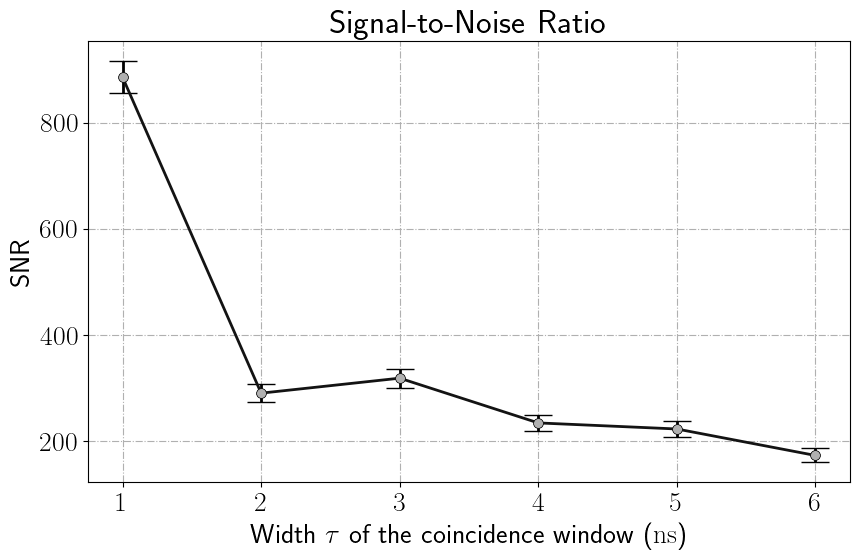

In [48]:
"""
Plot of the SNR against the window width
"""
# Figure size
plt.figure(figsize = (9, 6))

# Figure title and legends
plt.title(r"\textsf{Signal-to-Noise Ratio}")
plt.xlabel(r"\textsf{Width $ \tau $ of the coincidence window ($\mathrm{ns}$)}")
plt.ylabel(r"\textsf{SNR}")

# Plot of the errors
plt.errorbar(coincidence_window, snr, yerr = errors_snr, 
             fmt = 'o', capsize = 10, color = '#000000')

# Plot of the window width against the coincidence rate
plt.plot(coincidence_window, snr, color = '#131313')
plt.scatter(coincidence_window, snr, facecolor = '#B0B0B0', 
            edgecolor = '#000000', linewidth = 0.5, s = 50, zorder = 4)

# Final figure parameters
plt.tight_layout()
plt.savefig('./figures/snr.pdf')
